In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.table import Table
%matplotlib inline

Read ERy coarse table

In [2]:
m = Table.read('y3a2_coarse_auto_v1.fits')

In [3]:
limmag = m['LIMMAG'].T

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          7.00000000e+00,   5.50000000e+01,   2.03000000e+02,
          8.26000000e+02,   2.55700000e+03,   5.12300000e+03,
          7.84700000e+03,   1.17350000e+04,   1.58890000e+04,
          2.33640000e+04,   3.90420000e+04,   7.02520000e+04,
          1.19340000e+05,   1.84323000e+05,   2.47897000e+05,
          2.75069000e+05,   2.49667000e+05,   1.78335000e+05,
          9.95120000e+04,   4.30060000e+04,   1.41940000e+04,
          3.69500000e+03,   6.33000000e+02,   5.20000000e+01,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

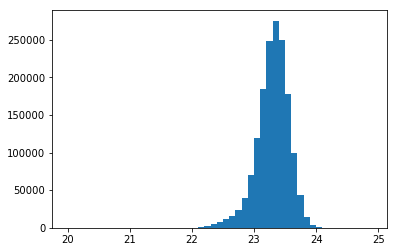

In [4]:
plt.hist(limmag[0], bins=np.arange(20,25,0.1))

In [5]:
print m.colnames
len(m)
print m.meta

['HPIX', 'LIMMAG', 'EXPTIME', 'LIMMAG_ERR', 'EXPTIME_ERR', 'NGAL', 'NPIX_FIT']
OrderedDict()


In [6]:
ra, dec = hp.pix2ang(1024, np.arange(hp.nside2npix(1024)), lonlat=True)
print ra, dec

[  45.  135.  225. ...,  135.  225.  315.] [ 89.95431464  89.95431464  89.95431464 ..., -89.95431464 -89.95431464
 -89.95431464]


Getting g mag lim and turning into a full map

In [7]:
g = np.zeros(hp.nside2npix(1024))+hp.UNSEEN
g[m['HPIX']] = limmag[0]

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


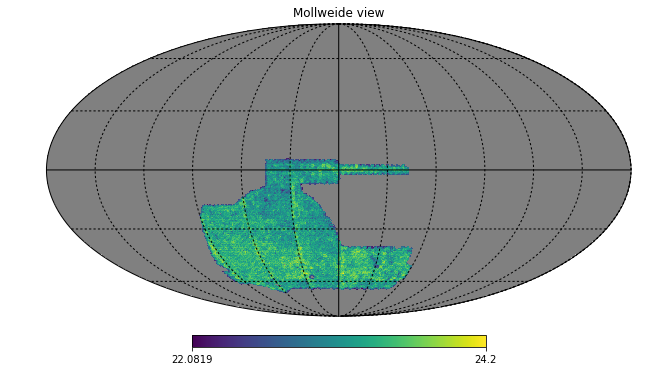

In [8]:
hp.mollview(g)
hp.graticule()

Reading my coarse map, which is a subregion of Y3A1

In [9]:
riom = Table.read('join_maglimfit_1_._10sigma_AUTO_coarsedepthmap.fits')

In [10]:
riolimmag = riom['LIMMAG'].T

Getting g mag lim 

In [11]:
riog = np.zeros(hp.nside2npix(1024))+hp.UNSEEN
riog[riom['HPIX']] = riolimmag[0]

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


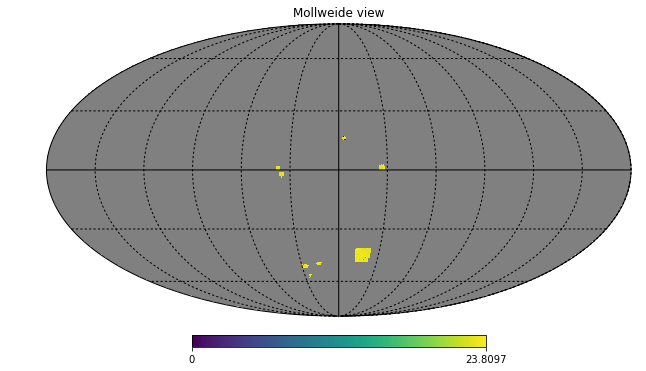

In [12]:
hp.mollview(riog, nest=True)
hp.graticule()

Getting g mag lim (turning from NEST to RING) and checking that this works

In [13]:
riog = np.zeros(hp.nside2npix(1024))+hp.UNSEEN
riog[hp.nest2ring(1024, riom['HPIX'])] = riolimmag[0]

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


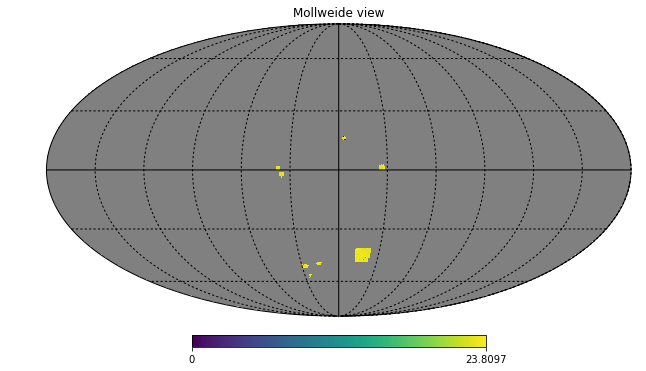

In [14]:
hp.mollview(riog)
hp.graticule()

Getting pixels in common

In [15]:
ryhpix = np.zeros(hp.nside2npix(1024))
ryhpix[m['HPIX']] = 1
riohpix = np.zeros(hp.nside2npix(1024))
riohpix[hp.nest2ring(1024, riom['HPIX'])] = 1

In [16]:
mask = (ryhpix == 1)*(riohpix == 1)

Plotting mag lim against mag lim. What the heck?

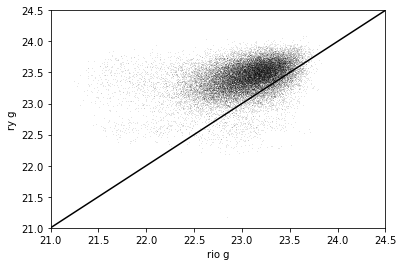

In [17]:
plt.plot(riog[mask], g[mask], 'k,', alpha=0.1)
plt.xlim(21, 24.5)
plt.ylim(21, 24.5)
plt.plot([21,24.5], [21, 24.5], 'k-')
plt.xlabel('rio g')
plt.ylabel('ry g')

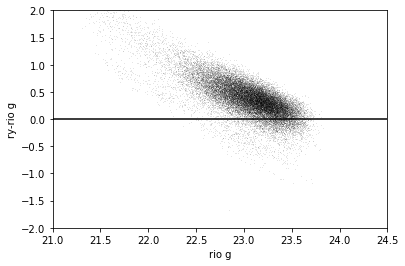

In [18]:
plt.plot(riog[mask], g[mask]-riog[mask], 'k,', alpha=0.1)
plt.plot([21, 24.5], [0, 0], 'k-')
plt.xlim(21, 24.5)
plt.ylim(-2, 2)
plt.xlabel('rio g')
plt.ylabel('ry-rio g')

In [19]:
print np.sum(mask)
print np.sum(ryhpix)
print np.sum(riohpix)

30254
1592632.0
31423.0


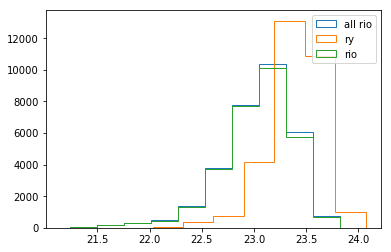

In [20]:
#plt.hist(g[g>0], histtype='step', label='all ry')
plt.hist(riog[riog>0], histtype='step', label='all rio')
plt.hist(g[mask], histtype='step', label='ry')
plt.hist(riog[mask], histtype='step', label='rio')
plt.legend()

In [21]:
g[g>0]

array([ 22.27924156,  22.21247673,  22.24337196, ...,  22.4520359 ,
        22.53260422,  22.5574913 ])

In [22]:
hp.ring2nest(1024, 6154660)

4550064

Reading region that has pixel 4550064

In [23]:
coadd = Table.read('4443_cropped_file.fits')

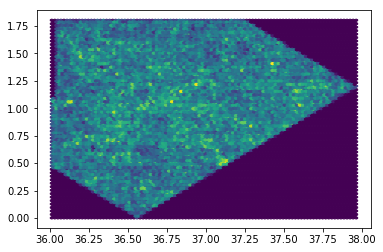

In [24]:
plt.hexbin(coadd['RA'], coadd['DEC'])

In [25]:
coadd.colnames

['COADD_OBJECTS_ID',
 'RA',
 'DEC',
 'ALPHAWIN_J2000',
 'DELTAWIN_J2000',
 'PFW_ATTEMPT_ID',
 'OBJECT_NUMBER',
 'PARENT_NUMBER',
 'TILENAME',
 'L',
 'B',
 'EBV',
 'HPIX',
 'KRON_RADIUS',
 'A_IMAGE',
 'B_IMAGE',
 'THETA_J2000',
 'ERRAWIN_WORLD',
 'ERRBWIN_WORLD',
 'ERRTHETAWIN_J2000',
 'ERRA_IMAGE',
 'ERRB_IMAGE',
 'ERRTHETA_IMAGE',
 'XWIN_IMAGE',
 'YWIN_IMAGE',
 'MAG_DETMODEL_G',
 'MAG_AUTO_G',
 'MAG_APER_8_G',
 'WAVGCALIB_MAG_PSF_G',
 'MAGERR_DETMODEL_G',
 'MAGERR_AUTO_G',
 'MAGERR_APER_8_G',
 'WAVG_MAGERR_PSF_G',
 'FLUX_DETMODEL_G',
 'FLUX_AUTO_G',
 'WAVG_FLUX_PSF_G',
 'FLUX_RADIUS_G',
 'FLUX_APER_8_G',
 'FLUXERR_DETMODEL_G',
 'FLUXERR_AUTO_G',
 'WAVG_FLUXERR_PSF_G',
 'FLUXERR_APER_8_G',
 'MU_EFF_MODEL_G',
 'MU_MAX_G',
 'MU_MAX_MODEL_G',
 'MU_MEAN_MODEL_G',
 'MU_THRESHOLD_G',
 'SPREADERR_MODEL_G',
 'SPREAD_MODEL_G',
 'CLASS_STAR_G',
 'NITER_MODEL_G',
 'WAVG_SPREADERR_MODEL_G',
 'WAVG_SPREAD_MODEL_G',
 'FLAGS_G',
 'IMAFLAGS_ISO_G',
 'NEPOCHS_G',
 'XCORR_SFD98_G',
 'MOLYGON_ID_G',
 'MA

In [26]:
testreg = Table.read('y3a2_testreg.fits')

In [27]:
RA = testreg['RA']
DEC = testreg['DEC']
len(RA)

616

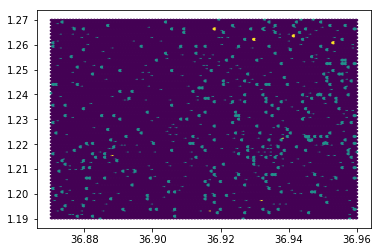

In [28]:
plt.hexbin(testreg['RA'], testreg['DEC'])

In [29]:
masktest = (RA > 36.87)*(RA < 36.96)*(DEC > 1.19)*(DEC < 1.27)
maskcoadd = (coadd['RA'] > 36.87)*(coadd['RA'] < 36.96)*(coadd['DEC'] > 1.19)*(coadd['DEC'] < 1.27)

In [30]:
ncoadd = coadd[maskcoadd]

Comparing magnitude distribution. It is OK.

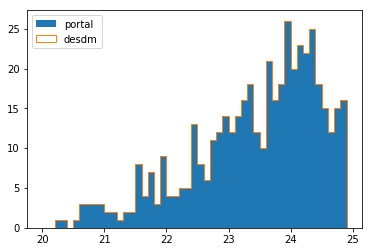

In [40]:
plt.hist(ncoadd['MAG_AUTO_G'], bins=np.arange(20,25,0.1), histtype='bar', label='portal')
plt.hist(testreg['MAG_AUTO_G'], bins=np.arange(20,25,0.1), histtype='step', label='desdm')
plt.legend()